In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 2D Gaussian Distribution
def gaussian_2D (mu, sigma, xs):
    return np.exp(-0.5 * np.diag((xs - mu) @ (np.linalg.inv(sigma)) @ (xs - mu).T)) \
               / (np.sqrt(np.linalg.det(sigma) * ((2 * np.pi)**2)))

def expection(pi_k, mu_k, sigma_k, xs):
    '''
    The expection step of EM algorithm.
    Input:
        pi_k: list of weights
        mu_k: list of means for gaussian components
        sigma_k: list of std deviation of gaussian components 
        xs: features, ndarray of shape (n, 2)
    Return:
        a matrix gamma_z_nk of shape(n, k), the expection of data points (n in total) under each components (k in total)
    '''
    const = np.zeros(xs.shape[0])
    for (pi, mu, sigma) in zip(pi_k, mu_k, sigma_k):
        const += pi * gaussian_2D(mu, sigma, xs)
        
    gamma_z_nk = []
    for (pi, mu, sigma) in zip(pi_k, mu_k, sigma_k):
        gamma_z_nk.append(pi * gaussian_2D(mu, sigma, xs) / const)
    return np.column_stack(gamma_z_nk)

def maximization(gamma_z_nk, xs):
    '''
    The maximization step of EM algorithm.
    Input: 
        gamma_z_nk: matrix gamma_z_nk of shape(n, k), the expection of data points (n in total) under each components (k in total)
        xs: features, ndarray of shape (n, k)
    Return:
        (pi_k, mu_k, sigma_k): parameters of Gaussian components
            pi_k: list of weights
            mu_k: list of means for gaussian components
            sigma_k: list of std deviation of gaussian components 
    '''
    nk = np.sum(gamma_z_nk, axis=0)
    mu_k = [(1 / n) * np.sum(np.expand_dims(gamma_z_nk[:, i], axis=1) * features, axis=0) for i, n in enumerate(nk)]
    sigma_k = [(1 / n) * ((xs-mu_k[i]).T @ np.diag(gamma_z_nk[:, i]) @ (xs-mu_k[i])) for i, n in enumerate(nk)]
    pi_k = [n / xs.shape[0] for n in nk]

    return pi_k, mu_k, sigma_k

def gmm(n_components, xs, max_iter=100):
    '''
    Implementation of the Guassian Mixture Model, fitted by EM algorithm.
    Input: 
        n_omponents: number of Gaussian Component
        xs: Features
        max_iter: maximum iterations
    Return:
        (pi_k, mu_k, sigma_k): parameters of Gaussian components
            pi_k: list of weights
            mu_k: list of means for gaussian components
            sigma_k: list of std deviation of gaussian components
    '''
    pi_k = [(1/n_components) for i in range(n_components)]
    mu_k = [np.random.rand(2) - 0.5 for i in range(n_components)]
    sigma_k = [np.array([[1, 0], [0, 1]]) for i in range(n_components)]

    for i in range(max_iter):
        gamma = expection(pi_k, mu_k, sigma_k, xs)
        pi_new, mu_new, sigma_new = maximization(gamma, xs)
        if np.allclose(pi_new, pi_k) and np.allclose(mu_new, mu_k) and np.allclose(sigma_new, sigma_k):
            break
        pi_k = pi_new
        mu_k = mu_new
        sigma_k = sigma_new

    return pi_k, mu_k, sigma_k
    

# A Toy Dataset

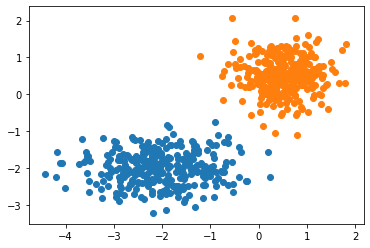

In [7]:
# generate dataset with two classes (labeled as 10 and 01, i.e. one-hot encoding)
n_pt = 300

cls1 = np.column_stack((np.random.normal(loc = [-2, -2], scale=[.8, .4], size=(n_pt, 2)), np.ones(n_pt), np.zeros(n_pt)))
cls2 = np.column_stack((np.random.normal(loc = [0.5, 0.5], scale=[.5, .5], size=(n_pt, 2)), np.zeros(n_pt), np.ones(n_pt)))

data_set = np.concatenate((cls1, cls2))
np.random.shuffle(data_set)

features = data_set[:, :2]
# labels are used for illustration only
labels = data_set[:, 2:]

plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

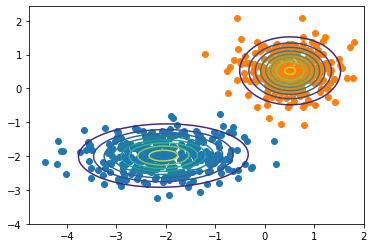

In [8]:
# helper function to draw gaussian distribution
def draw(mu, sigma, rng):
    arr = []
    for y in np.linspace(rng[0], rng[1], 100):
        for x in np.linspace(rng[0], rng[1], 100):
            arr.append([x, y])
    arr = np.array(arr)
    gaus = gaussian_2D(mu, sigma, arr)

    plt.contour(np.linspace(rng[0], rng[1], 100), np.linspace(rng[0], rng[1], 100), np.reshape(gaus, (100, 100)), levels=8)

plt.scatter(features[labels[:, 1] == 0][:, 0], features[labels[:, 1] == 0][:, 1])
plt.scatter(features[labels[:, 1] == 1][:, 0], features[labels[:, 1] == 1][:, 1])

pi_k, mu_k, sigma_k = gmm(2, features)
for (mu, sigma) in zip(mu_k, sigma_k):
    draw(mu, sigma, (-4, 2))